<a href="https://colab.research.google.com/github/ElizRoy/Portfolio-Sensemaking/blob/main/UNDPSensemaking2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UNDP Portfolio Sensemaking project**

June 2020

#**Data Collection**
Loading all the Country Programme Documents from PDF files and merging with metadata file CPD


In [ ]:
!sudo apt-get install libpoppler-cpp-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpoppler-cpp0v5 libpoppler-dev
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5 libpoppler-dev
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 41.3 kB of archives.
After this operation, 233 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp0v5 amd64 0.62.0-2ubuntu2.10 [28.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-dev amd64 0.62.0-2ubuntu2.10 [4,608 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp-dev amd64 0.62.0-2ubuntu2.10 [8,684 B]
Fetched 41.3 kB in 1s (57.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
!pip3 install pdftotext

     |████████████████████████████████| 102kB 3.2MB/s 
  Created wheel for pdftotext: filename=pdftotext-2.1.5-cp36-cp36m-linux_x86_64.whl size=54103 sha256=cc35bc13432463764bfa48fef598cf534cf937302465950156ba937cea587b75
  Stored in directory: /root/.cache/pip/wheels/59/1d/72/339d726f6737b281a498eb05203256a30f19c54193738996bc
Successfully built pdftotext


In [ ]:
pip install unicodedata2

     |████████████████████████████████| 430kB 4.5MB/s 


In [ ]:
#Mounting the drive
import pdftotext
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


def pdf_to_text(filename):
  f = open(filename, "rb")
  pdf = pdftotext.PDF(f)
  text = "\n\n".join(pdf)
  return text

#pdf has the text content now
cpd = pd.read_excel('/content/drive/My Drive/Colab Notebooks/CPD.xlsx')
path = '/content/drive/My Drive/Colab Notebooks/Data/'

file_names = []
content = []

for fname in os.listdir(path):
  fpath = os.path.join(path, fname)
  #print(fname)
  file_names.append(fname)
  #content.append(pdf_to_text(fpath))
  s = pdf_to_text(fpath)
  content.append(s)

pdfs = pd.DataFrame({'text':content, 'id':file_names})

#Extracting digits from the string file_names
pdfs['id'] = pdfs['id'].astype(str)
pdfs['sort'] = pdfs['id'].str.extract('(\d+)', expand = False).astype(int)
pdfs.sort_values('sort', inplace=True)
df=pdfs.drop('sort', axis=1)

#Resetting the index of df in order to merge with the right country in cpd
df = df.reset_index(drop=True)

#Merging with the corresponding country names
data = cpd.merge(df, left_index=True, right_index=True)

del data['id']


**Saving all documents into a single CSV file**

In [ ]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/Models/uncleaned_data.csv', sep = " ")

In [ ]:
len(data)

0

In [ ]:
data.country[1]

IndexError: ignored

#**Data preprocessing**

We will be using the NLTK (Natural Language Toolkit) library here.

In [ ]:
# import the necessary libraries
import nltk
import string
import re
import pandas as pd
import unicodedata
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import pickle
import sys
sys.setrecursionlimit(100000)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Text Lowercase**

In [ ]:
def text_lowercase(text):
    return text.lower()

**Removing all strings beginning with dp**

In [ ]:
def remove_dp(text):
  t=re.sub(r"\bdp\w+", "", text)
  return t

**Removing numbers**

In [ ]:
def remove_numbers(text):
    temp_str = text.split()
    new_string = []

    for word in temp_str:
        if not word.isdigit():
          new_string.append(word)

    temp_str = ' '.join(new_string)
    return temp_str
 # result = re.sub("(^|\W)\d+($|\W)", "", text)


**Removing accents**

Countries like São Tomé and Príncipe (93) and others have accents in them

In [ ]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)


**Removing punctuation**

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


**Removing default stopwords**  

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    newstop_words =  ['a', 'according', 'achieve', 'achieve sustainable', 'action',
                  'b', 'c', 'd','e','f','g','h','i','j','k','l','m','n','o','p','q',
                  'r','s','t','u','v','w','x','y','z', 'added', 'addition', 'address',
             'affect', 'ages', 'ages persons', 'ages year', 'iii','executive','board',
             'distr','general','english','session','annex','iv','content','page',
             'ages year older', 'agreed', 'aids', 'aiming', 'document','draft',
           'allocated', 'appropriate', 'areas', 'assistance',
           'associated', 'attention', 'availability', 'based', 'first','second',
           'original','rationale','chapter','sdg','basis', 'cent', 'capita',
           'circumstances','almost','least','sdgs','new york',
       'contribution', 'covered', 'coverage', 'currently', 'dollars', 'double',
         'effective', 'ensure', 'forms', 'global', 'relate','item','service',
             'gross', 'ii', 'increase', 'increase number', 'men', 'country',
              'months', 'national', 'number', 'particular',
           'persons', 'persons attributed', 'persons directly', 'program','matter',
          'ratio', 'sex', 'sex ages', 'sex ages persons', 'project', 'office',
         'states', 'states development', 'states' ,'development', 'countries',
           'states dollars', 'support', 'sustainable', 'women ages',
           'january','february','march','april','may','june','july','august','september',
           'october','november','december','year', 'year ages', 'new','york',
            'undp', 'united','programme', 'nations']
    stop_words.update(newstop_words)
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

**Clean the Dataframe**  

In [ ]:
def clean_text(text):
  text = text_lowercase(text)
  text = strip_accents(text)
  text = remove_punctuation(text)
  text = remove_dp(text)
  text = remove_stopwords(text)
  text = remove_numbers(text)
  return text

data.text = [clean_text(t) for t in data.text]
print (data.text.head(1))



0    population fund services regular provisional a...
Name: text, dtype: object


**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

**Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

#**Tokenizing documents**

Tokenize: Make each sentence into a list of words.


In [ ]:
my_list = data['text'].to_list()
totalvocab_lemmatized = []
totalvocab_stemmed = []
totalvocab_tokenized = []
tokenized_des = []
#pos = []
#ner = []


for doc in my_list:
  line_tokens = stem_words(doc)
  totalvocab_stemmed.extend(line_tokens)
  totalvocab_tokenized.extend(word_tokenize(doc))
  tokenized_des.append(lemmatize_words(doc))


vocab_df = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
document = pd.DataFrame({'doc_tokens':tokenized_des})

data = data.merge(document, left_index=True, right_index=True)



**Removing Congo and Senegal and writing resultant preprocessed data into csv**

In [ ]:
#Removing Congo 72, Senegal 94
data = data.drop([72,94])


#**Merge all in one data frame**
data.to_csv('/content/drive/My Drive/Colab Notebooks/Models/processed_data.csv')
#with open('/content/drive/My Drive/Colab Notebooks/Models/processed_data.pkl', 'wb') as f:
#    pickle.dump(data, f)

# **Feature Engineering**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd


**Wordcloud**

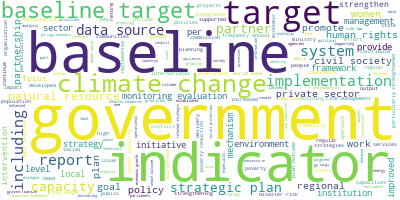

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.text))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=4, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# **Topic Model**

**LDA**
Latent Dirichlet Allocation


In [ ]:
!pip3 install pyLDAvis

     |████████████████████████████████| 1.6MB 5.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7969cb7b1af0722bbdbffe3908819f483a1d0a6f094a7c4c337f5ae9287054db
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


**Importing Gensim and plotting tools**

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
#from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

**Create the Dictionary and Corpus needed for Topic Modeling**

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data.doc_tokens)

# Create Corpus
texts = data.doc_tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 8), (6, 23), (7, 1), (8, 1), (9, 1), (10, 5), (11, 9), (12, 2), (13, 5), (14, 10), (15, 1), (16, 2), (17, 16), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 5), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 8), (31, 1), (32, 1), (33, 7), (34, 1), (35, 1), (36, 7), (37, 1), (38, 2), (39, 1), (40, 3), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 20), (48, 1), (49, 1), (50, 6), (51, 1), (52, 1), (53, 1), (54, 3), (55, 2), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 5), (67, 6), (68, 1), (69, 1), (70, 1), (71, 8), (72, 26), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 6), (79, 20), (80, 1), (81, 1), (82, 2), (83, 4), (84, 21), (85, 11), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 31), (109, 1),

In [ ]:
type(data.doc_tokens)

pandas.core.series.Series

**BUILD LDA MODEL**

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


**LDA model with 6 topics**

In addition to the corpus and dictionary, you need to provide the number of topics as well as input to LDA model.


In [ ]:
number_of_topics= 6
words=10

**Visualize the topics**

To examine the produced topics and the associated keywords,we use pyLDAvis package's interactive chart.

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.324826 -0.032235       1        1  86.971924
5      0.119320 -0.095823       2        1   4.775244
0     -0.001452  0.282944       3        1   3.910486
1     -0.074472 -0.058889       4        1   2.446128
3     -0.197328 -0.057669       5        1   1.045071
2     -0.170894 -0.038328       6        1   0.851134, topic_info=             Term         Freq        Total Category  logprob  loglift
912      regional   930.000000   930.000000  Default  30.0000  30.0000
509        health   756.000000   756.000000  Default  29.0000  29.0000
885        public  1200.000000  1200.000000  Default  28.0000  28.0000
455          food   542.000000   542.000000  Default  27.0000  27.0000
357      economic  1443.000000  1443.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2544         irrf    33.400333    99.056000   Topic6  -4.4387   3.6792
13297     fannual    11.631696    21.529259   Topic6  -5.4936   4.1507
891       quickly     7.981095    12.729152   Topic6  -5.8702   4.2995
11959     auditor     9.581234    40.325943   Topic6  -5.6875   3.3292
2061   functional     7.828151   141.556625   Topic6  -5.8896   1.8714

[350 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
12851      6  0.896150       5yearly
6          1  0.996478        access
6          2  0.003455        access
20         1  0.844541    activities
20         2  0.003248    activities
...      ...       ...           ...
14143      5  0.983417       zambias
14144      5  0.916533  zambiaunited
13931      3  0.997411      zanzibar
14145      5  0.916533          zccs
14147      5  0.984418          zema

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 2, 4, 3])

**Word Clouds of Top N Keywords in Each Topic**

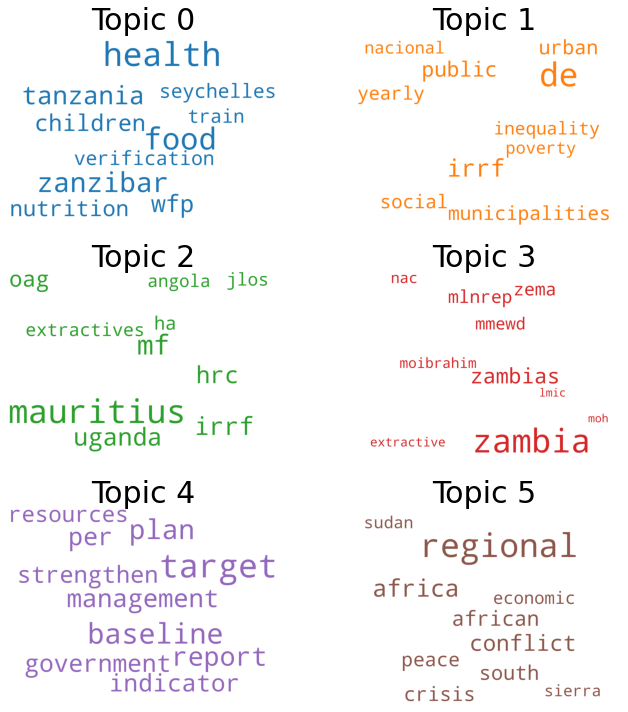

In [ ]:
# 1. Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#stopwords=stop_words,
cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=5000,
                  contour_color='steelblue',
                 # colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],prefer_horizontal=1.0)
#topics = gensimmodel30.get_document_topics(corpus)
topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud.to_image())
    plt.gca().set_title('Topic ' + str(i),fontdict=dict(size=30))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Hierarchical document clustering**


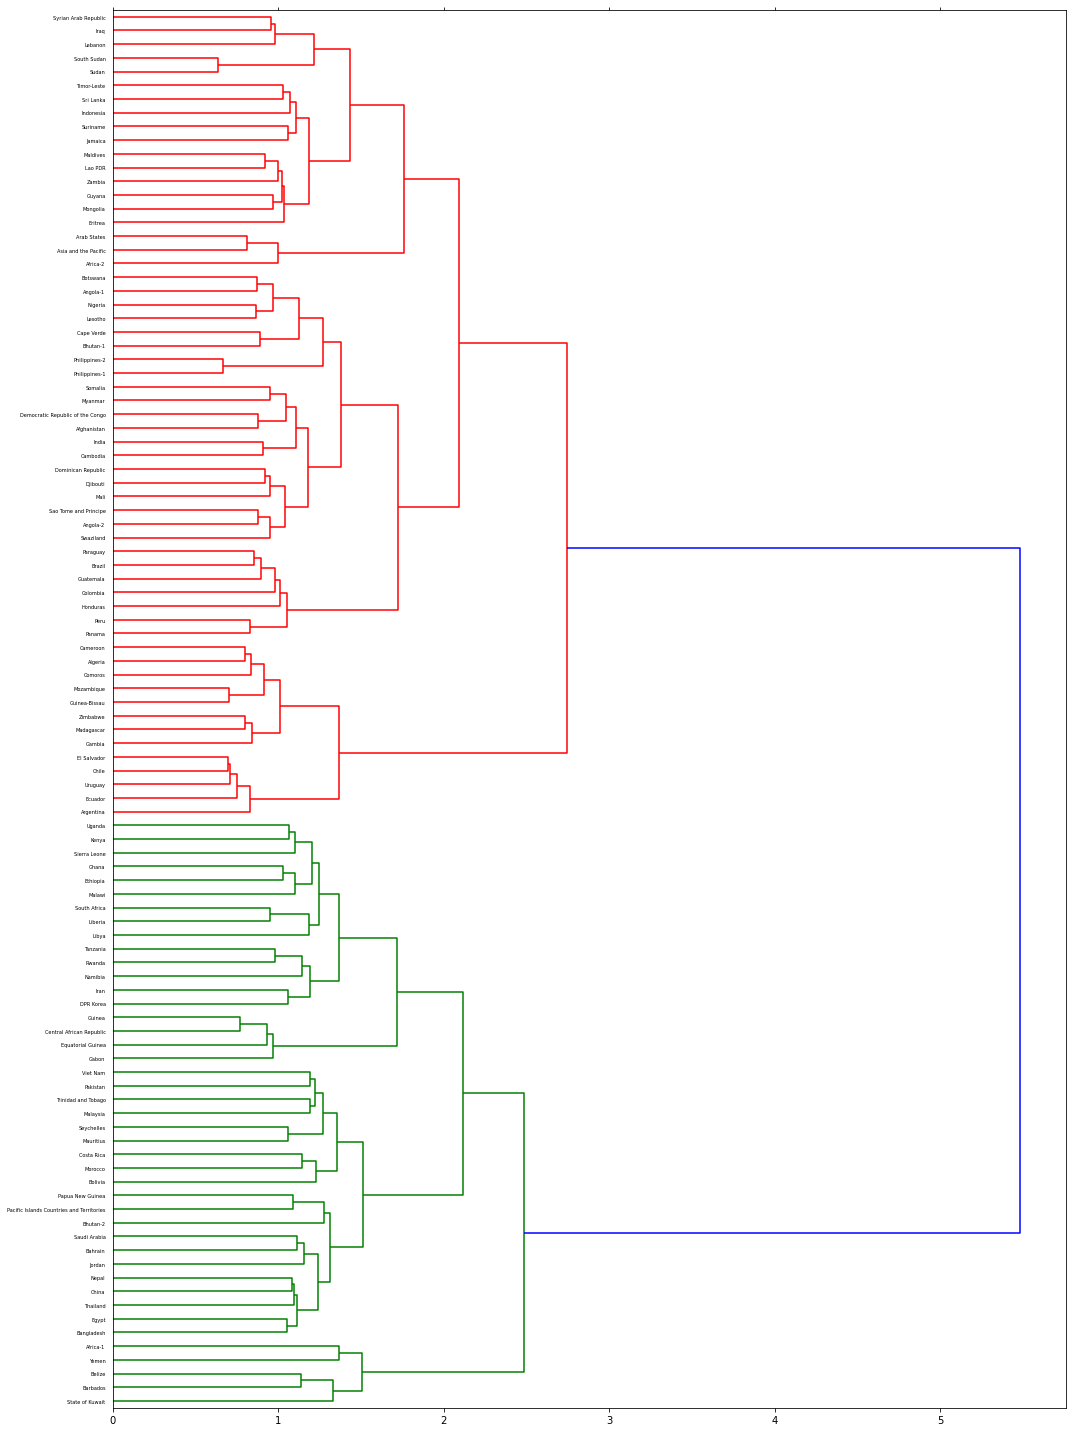

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import os
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(data.text)


from scipy.cluster.hierarchy import ward, dendrogram
#dist is the Cosine distance
dist = 1 - cosine_similarity(tf_data)

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=list(data.country));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom='off',       # ticks along the bottom edge are off
    top='off',          # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout